# ANALYSIS OF POTENTIAL CH MUTATIONS IN KNOWN CH DRIVER GENES IN UKB DATASET

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# READ CH POTENTIAL MUTATIONS DATA

CH_mutations_50K_pot = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_filt_50k.txt.gz',
                                    sep= '\t')
CH_mutations_50K_pot

/home/sdemajo/miniconda3/envs/clonalh/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146417,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,310,43,316,359","5,7,1,1",BaseQRankSum=-0.802;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5744263,NaN,NaN,NaN
146418,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,368,43,374,418","4,8,1,1",BaseQRankSum=-1.462;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1623960,NaN,NaN,NaN
146419,X,124100595,.,T,A,0.25,2,11,0.181818,0.818182,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/K,NaN,ENSP00000360187,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,288,43,294,337","4,5,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,A|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=A|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1686791,NaN,NaN,NaN
146420,X,124100596,.,A,T,0.06,2,13,0.153846,0.846154,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3806,1269,*/L,NaN,ENSP00000360187,NaN,NaN,0/1,"11,2,0",10,NaN,NaN,"10,0,374,43,380,424","4,7,1,1",BaseQRankSum=-2.190;DP=13;ExcessHet=3.0103;MLE...,T|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=T|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5949268,NaN,NaN,NaN


In [3]:
### GET LIST OF KNOWN CH DRIVER GENES

chgenes = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/data/stablished_CH_drivers.txt',
                      sep= '\t', header=None)

chgenes = chgenes[0].tolist()
print(len(chgenes))
chgenes.sort()
chgenes

15


['ASXL1',
 'CBL',
 'DNMT3A',
 'GNAS',
 'GNB1',
 'IDH2',
 'JAK2',
 'KRAS',
 'MYD88',
 'NRAS',
 'PPM1D',
 'SF3B1',
 'SRSF2',
 'TET2',
 'TP53']

In [4]:
### CHECK IF ALL OF THEM ARE IN MSKCC

## OPEN MSKCC MUTATION DATA
ch_mskcc = pd.read_csv("/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/MSKCC_ch_mutations.txt.gz", sep="\t")
ch_mskcc

,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence,size
0,chr1,43339388,G,A,MPL,170,missense_variant,1
1,chr1,43339490,C,T,MPL,204,missense_variant,1
2,chr1,43346490,A,T,MPL,342,synonymous_variant,1
3,chr1,43346868,G,A,MPL,414,synonymous_variant,1
4,chr1,43346895,T,C,MPL,423,synonymous_variant,1
...,...,...,...,...,...,...,...,...
3671,chrX,124086699,C,G,STAG2,1069,missense_variant,1
3672,chrX,124086717,C,-,STAG2,1075,frameshift_variant,1
3673,chrX,124090606,G,A,STAG2,1103,stop_gained,1
3674,chrX,124095390,C,T,STAG2,1242,stop_gained,1


In [5]:
# Get genes from MSKCC
chgenes_mskcc = ch_mskcc[ch_mskcc['Hugo_Symbol'].isin(chgenes)]['Hugo_Symbol'].unique().tolist()
print(len(chgenes_mskcc))

# Get gene missing
set(chgenes)-set(chgenes_mskcc)

14


{'GNB1'}

## Get potential CH mutations from the 15 known CH genes

In [6]:
CH_mutations_knowngenes = CH_mutations_50K_pot[CH_mutations_50K_pot['SYMBOL'].isin(chgenes)]
CH_mutations_knowngenes

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99870,9,5126785,.,TG,T,0.01,2,22,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,JAK2,ENST00000381652,3394,1132,G/X,NaN,ENSP00000371067,NaN,NaN,0/1,"20,2,0",9,NaN,NaN,"9,0,682,69,688,757","1,19,1,1",BaseQRankSum=-2.409;DP=22;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,.,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,4418303,NaN,NaN,NaN
99871,9,5126786,.,G,A,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",2,NaN,NaN,"2,0,473,43,479,522","1,13,1,1",BaseQRankSum=-1.556;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5067309,NaN,NaN,NaN
99872,9,5126786,.,G,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,380,43,386,429","1,9,1,1",BaseQRankSum=-1.649;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,2030823,NaN,NaN,NaN
99873,9,5126789,.,T,A,0.01,2,16,0.125000,0.875000,1,SNV,stop_lost,HIGH,JAK2,ENST00000381652,3397,1133,*/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",1,NaN,NaN,"1,0,467,43,473,516","1,13,1,1",BaseQRankSum=-1.902;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,.,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,2048065,NaN,NaN,NaN


In [7]:
### SAVE

CH_mutations_knowngenes.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_knownCHgenes_50k.txt.gz',
                              sep="\t", index=False, compression='gzip')

In [8]:
### Number of different potential CH mutations

print('Total number of CH mutations:')
print(len(CH_mutations_knowngenes))
print()
print('Number of different CH mutations:')
print(len(CH_mutations_knowngenes.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))

Total number of CH mutations:
9722

Number of different CH mutations:
4796


In [9]:
### Number of mutated genes

len(CH_mutations_knowngenes.groupby(['SYMBOL']))

15

In [10]:
### Number of patients with CH mutations

print('Number of patients with potential CH mutations in known CH drivers:')
print(len(CH_mutations_knowngenes['patient'].value_counts()))
print()
print('Percentage of patients with potential CH mutations in known CH drivers:')
print(round(len(CH_mutations_knowngenes['patient'].value_counts())/ 49988 *100, 2))

Number of patients with potential CH mutations in known CH drivers:
8511

Percentage of patients with potential CH mutations in known CH drivers:
17.03


In [11]:
### Number of potential CH mutations per patient

CH_mutations_knowngenes['patient'].value_counts().value_counts()


1    7461
2     912
3     122
4      10
5       5
6       1
Name: patient, dtype: int64

In [12]:
### DP, AD & VAF

round(CH_mutations_knowngenes[['DP', 'AD_alt', 'VAF_alt']].describe(), 3)

,DP,AD_alt,VAF_alt
count,9722.000,9722.000,9722.000
mean,32.785,3.486,0.104
std,20.873,3.860,0.052
min,7.000,2.000,0.022
25%,20.000,2.000,0.065
50%,29.000,2.000,0.087
75%,37.000,2.000,0.133
max,274.000,44.000,0.299


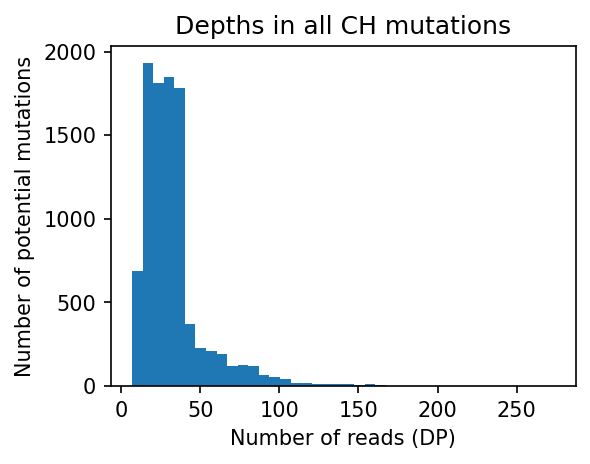

In [13]:
# Histogram DP

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes['DP'], 40)
plt.title('Depths in all CH mutations')
plt.xlabel('Number of reads (DP)')
plt.ylabel('Number of potential mutations')
plt.show()

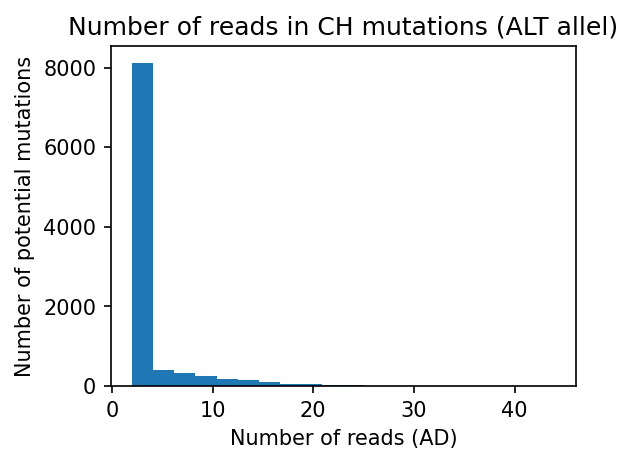

In [14]:
# Histogram AD

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes['AD_alt'], 20)
plt.title('Number of reads in CH mutations (ALT allel)')
plt.xlabel('Number of reads (AD)')
plt.ylabel('Number of potential mutations')
plt.show()

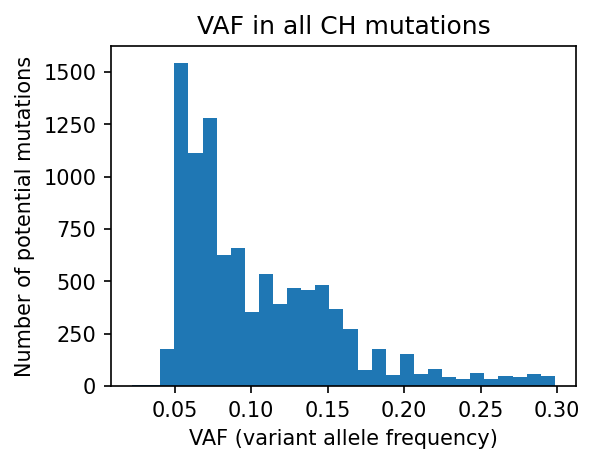

In [15]:
# Histogram VAF

plt.hist(CH_mutations_knowngenes['VAF_alt'], 30)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF (variant allele frequency)')
plt.ylabel('Number of potential mutations')
plt.show()

In [16]:
VAFs = CH_mutations_knowngenes['VAF_alt']

print("Total number of variants:")
print(len(VAFs))
print()

print("Number of variants with VAF < 25%:")
VAF_25 = [i for i in VAFs if i < 0.25]
print(len(VAF_25))
print(round(len(VAF_25) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 20%:")
VAF_20 = [i for i in VAFs if i < 0.20]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 15%:")
VAF_20 = [i for i in VAFs if i < 0.15]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 10%:")
VAF_20 = [i for i in VAFs if i < 0.10]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

Total number of variants:
9722

Number of variants with VAF < 25%:
9441
97.1

Number of variants with VAF < 20%:
9067
93.3

Number of variants with VAF < 15%:
8074
83.0

Number of variants with VAF < 10%:
5470
56.3



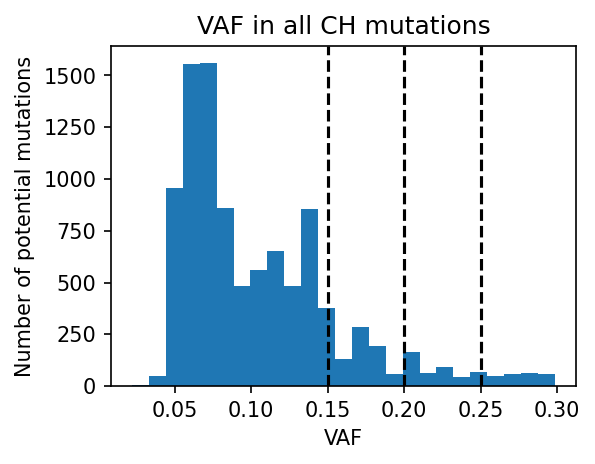

In [17]:
# Histogram VAF with thresholds

plt.hist(CH_mutations_knowngenes['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.axvline(x=0.25, color='black',linestyle='--')
plt.axvline(x=0.2, color='black',linestyle='--')
plt.axvline(x=0.15, color='black',linestyle='--')
#plt.axvline(x=0.1, color='black',linestyle='--')
plt.show()

In [18]:
### Number of ALT per position

CH_mutations_knowngenes['ALT_num'].value_counts()

1    9658
2      64
Name: ALT_num, dtype: int64

In [19]:
### Type of variant

CH_mutations_knowngenes['var_type'].value_counts()

SNV      8670
Indel    1045
MNV         7
Name: var_type, dtype: int64

In [20]:
### Type of consequence

round(CH_mutations_knowngenes['Consequence'].value_counts().head(10) / 9722 * 100, 1)


missense_variant                            75.3
frameshift_variant                           9.7
stop_gained                                  6.3
missense_variant&splice_region_variant       5.3
splice_region_variant&synonymous_variant     1.6
inframe_deletion                             0.5
stop_gained&splice_region_variant            0.5
frameshift_variant&splice_region_variant     0.3
stop_lost                                    0.1
stop_retained_variant                        0.1
Name: Consequence, dtype: float64

In [21]:
### IMPACT

round(CH_mutations_knowngenes['IMPACT'].value_counts().head(20) / 9722 * 100, 1)


MODERATE    81.1
HIGH        17.1
LOW          1.7
Name: IMPACT, dtype: float64

In [22]:
### Mutations per gene

CH_mutations_knowngenes.groupby(['SYMBOL']).size().sort_values(ascending=False).head(20)

SYMBOL
SF3B1     3025
JAK2      1882
TET2       816
DNMT3A     808
ASXL1      773
CBL        578
GNAS       552
TP53       374
NRAS       223
PPM1D      200
GNB1       196
IDH2       124
KRAS        76
SRSF2       63
MYD88       32
dtype: int64

Text(0.5, 1.0, 'Number of mutations per gene')

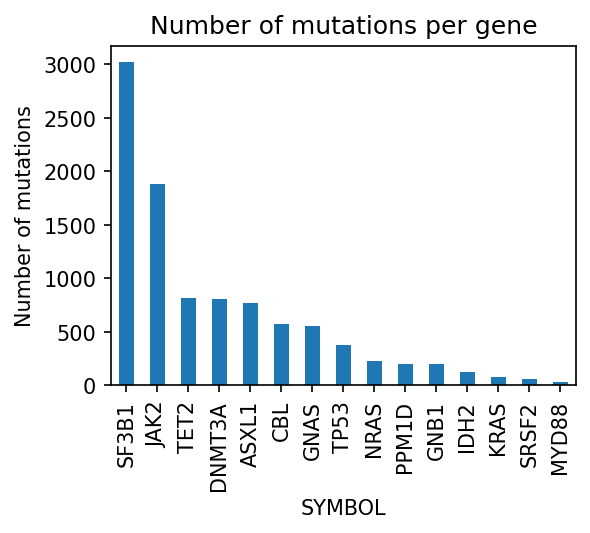

In [23]:
# Histogram

graph = CH_mutations_knowngenes.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(4,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutations per gene")

In [24]:
#from IPython.core.display import HTML
### Mutations per gene position

mut_genpos = CH_mutations_knowngenes.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)
df = mut_genpos.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Protein position','Number mutations']
df.head(15).style.set_properties(**{'text-align':'center'})
#display(a)
#display(HTML(mut_genpos.head(20).to_frame().to_html()))


,Gene symbol,Protein position,Number mutations
0,ASXL1,643,160
1,DNMT3A,882,91
2,SF3B1,580,74
3,GNAS,986,70
4,SF3B1,912,58
5,SF3B1,881,57
6,SF3B1,152,55
7,SF3B1,613,55
8,SF3B1,579,54
9,SF3B1,907,54


In [25]:
### Number of mutation sites per gene

mut_genpos_n =mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False)
df = mut_genpos_n.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Number mutation sites']
df.head(10).style.set_properties(**{'text-align':'center'})

,Gene symbol,Number mutation sites
0,JAK2,564
1,SF3B1,537
2,TET2,385
3,DNMT3A,294
4,ASXL1,232
5,CBL,203
6,TP53,122
7,PPM1D,104
8,GNAS,87
9,GNB1,75


Text(0.5, 1.0, 'Number of mutation sites per gene')

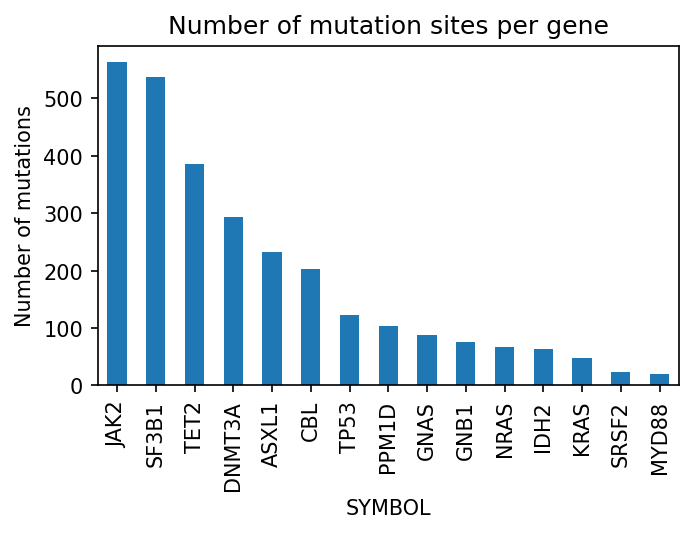

In [26]:
# Histogram

graph = mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(5,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutation sites per gene")

# STUDY MOST FREQUENT MUTATIONS

In [27]:
### ASXL1_643

ASXL1_643 = CH_mutations_knowngenes[(CH_mutations_knowngenes['SYMBOL'] == 'ASXL1') & (CH_mutations_knowngenes['Prot_pos'] == '643')]
ASXL1_643

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
61492,20,32434638,rs781077343,AG,A,0.06,7,65,0.107692,0.892308,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/1,"58,7,0",19,NaN,NaN,"19,0,1566,193,1587,1780","39,19,4,3",BaseQRankSum=-3.462;DB;DP=66;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,4443234,ASXL1,643.0,2.0
61493,20,32434638,rs781077343,AG,A,0.00,4,51,0.078431,0.921569,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"47,4,0",31,NaN,NaN,"0,31,1309,141,1321,1431","22,25,1,3",BaseQRankSum=-1.792;DB;DP=57;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,4491285,ASXL1,643.0,2.0
61494,20,32434638,rs781077343,AG,A,0.00,5,69,0.072464,0.927536,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"64,5,0",54,NaN,NaN,"0,54,1777,192,1792,1930","32,32,3,2",BaseQRankSum=-1.256;DB;DP=73;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,4515013,ASXL1,643.0,2.0
61495,20,32434638,rs781077343,AG,A,0.00,6,77,0.077922,0.922078,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"71,6,0",47,NaN,NaN,"0,47,1953,213,1972,2137","44,27,2,4",BaseQRankSum=-0.396;DB;DP=81;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,4322361,ASXL1,643.0,2.0
61496,20,32434638,rs781077343,AG,A,0.00,5,55,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"50,5,0",12,NaN,NaN,"0,12,1364,150,1379,1517","28,22,1,4",BaseQRankSum=0.479;DB;DP=59;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,4309053,ASXL1,643.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61647,20,32434638,rs781077343,AG,A,0.00,5,55,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"50,5,0",13,NaN,NaN,"0,13,1372,150,1387,1525","25,25,1,4",BaseQRankSum=0.315;DB;DP=58;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,3796196,ASXL1,643.0,2.0
61648,20,32434638,rs781077343,AG,A,0.00,6,60,0.100000,0.900000,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/1,"54,6,0",3,NaN,NaN,"3,0,1466,166,1484,1649","22,32,3,3",BaseQRankSum=-1.196;DB;DP=66;ExcessHet=3.0103;...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,3847277,ASXL1,643.0,2.0
61649,20,32434638,rs781077343,AG,A,0.00,3,47,0.063830,0.936170,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"44,3,0",49,NaN,NaN,"0,49,1220,132,1229,1312","22,22,2,1",BaseQRankSum=0.289;DB;DP=51;ExcessHet=3.0103;M...,-|frameshift_variant|HIGH|ASXL1|ENSG0000017145...,.,CSQ=-|frameshift_variant|HIGH|ASXL1|ENSG000001...,3849882,ASXL1,643.0,2.0
61650,20,32434638,rs781077343,AG,A,0.00,6,79,0.075949,0.924051,1,Indel,frameshift_variant,HIGH,ASXL1,ENST00000375687,1927,643,G/X,rs750318549,ENSP00000364839,0.000286,0.000343,0/0,"73,6,0",55,NaN,NaN,"0,55,2025,219,2043,2208","43,30,3,3",BaseQRankSum=-0.511;DB;DP=88;E

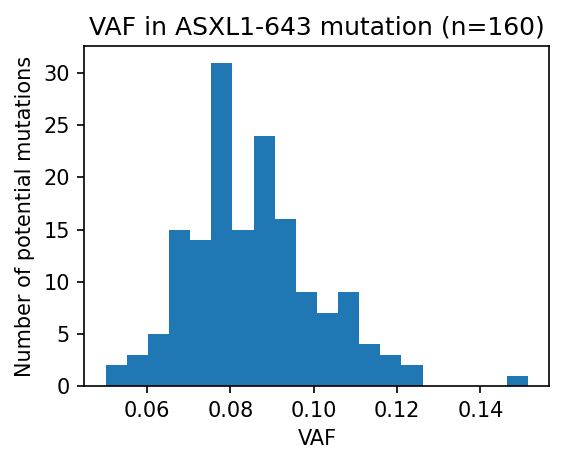

In [28]:
# Histogram
plt.hist(ASXL1_643['VAF_alt'], 20)
plt.title('VAF in ASXL1-643 mutation (n=160)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()

In [29]:
### DNMT3A-882

DNMT3A_882 = CH_mutations_knowngenes[(CH_mutations_knowngenes['SYMBOL'] == 'DNMT3A') & (CH_mutations_knowngenes['Prot_pos'] == '882')]
DNMT3A_882

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
56084,2,25234373,rs147001633,C,T,283.77,18,98,0.183673,0.816327,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"80,18,0",99,NaN,NaN,"312,0,2445,552,2499,3052","27,53,10,8",BaseQRankSum=0.690;DB;DP=98;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4169546,DNMT3A,882.0,239.0
56085,2,25234373,rs147001633,C,T,7.60,6,54,0.111111,0.888889,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"48,6,0",35,NaN,NaN,"35,0,1494,178,1512,1691","21,27,1,5",BaseQRankSum=-0.598;DB;DP=54;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4407182,DNMT3A,882.0,239.0
56086,2,25234373,rs147001633,C,T,163.77,9,52,0.173077,0.826923,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"43,9,0",99,NaN,NaN,"192,0,1428,322,1455,1777","18,25,4,5",BaseQRankSum=1.219;DB;DP=52;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4366533,DNMT3A,882.0,239.0
56087,2,25234373,rs147001633,C,T,228.77,13,62,0.209677,0.790323,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"49,13,0",99,NaN,NaN,"257,0,1565,405,1604,2009","21,28,5,8",BaseQRankSum=-0.452;DB;DP=62;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4736540,DNMT3A,882.0,239.0
56088,2,25234373,rs147001633,C,T,1.39,7,72,0.097222,0.902778,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"65,7,0",24,NaN,NaN,"24,0,2193,219,2214,2433","25,40,3,4",BaseQRankSum=-0.213;DB;DP=72;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4118099,DNMT3A,882.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56170,2,25234374,rs377577594,G,A,259.77,12,59,0.203390,0.796610,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"47,12,0",99,NaN,NaN,"288,0,1496,429,1532,1962","13,34,6,6",BaseQRankSum=0.067;DB;DP=59;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,2978549,DNMT3A,882.0,239.0
56171,2,25234374,rs377577594,G,A,0.00,2,36,0.055556,0.944444,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/0,"34,2,0",29,1|0,25234373_C_T,"0,29,1181,102,1187,1260","9,25,1,1",BaseQRankSum=0.108;DB;DP=36;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,2486949,DNMT3A,882.0,239.0
56172,2,25234374,rs377577594,G,A,121.77,10,76,0.131579,0.868421,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"66,10,0",99,NaN,NaN,"150,0,2103,349,2133,2482","24,42,5,5",BaseQRankSum=0.320;DB;DP=76;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG

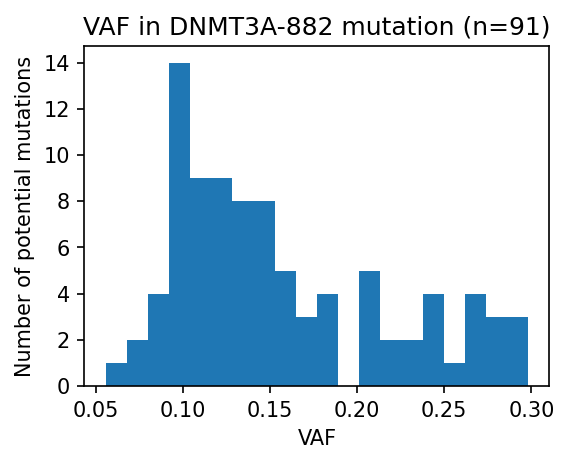

In [30]:
# Histogram
plt.hist(DNMT3A_882['VAF_alt'], 20)
plt.title('VAF in DNMT3A-882 mutation (n=91)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()


In [31]:
### SF3B1-580

SF3B1_580 = CH_mutations_knowngenes[(CH_mutations_knowngenes['SYMBOL'] == 'SF3B1') & (CH_mutations_knowngenes['Prot_pos'] == '580')]
SF3B1_580

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
59277,2,197403014,.,GC,G,0.0,2,37,0.054054,0.945946,1,Indel,frameshift_variant,HIGH,SF3B1,ENST00000335508,1740,580,P/X,COSV59219929,ENSP00000335321,NaN,NaN,0/0,"35,2,0",21,0|1,197403014_GC_G,"0,21,1446,105,1452,1536","16,19,1,1",BaseQRankSum=-1.106;DP=37;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|SF3B1|ENSG000001...,.,CSQ=-|frameshift_variant|HIGH|SF3B1|ENSG000001...,3371443,NaN,NaN,NaN
59279,2,197403016,.,G,T,0.0,2,36,0.055556,0.944444,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1739,580,P/Q,NaN,ENSP00000335321,NaN,NaN,0/0,"34,2,0",60,NaN,NaN,"0,60,1074,102,1080,1122","11,23,1,1",BaseQRankSum=-1.906;DP=36;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,4851873,NaN,NaN,NaN
59280,2,197403016,.,G,A,0.0,2,25,0.080000,0.920000,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1739,580,P/L,NaN,ENSP00000335321,NaN,NaN,0/0,"23,2,0",25,NaN,NaN,"0,25,709,69,715,758","6,17,1,1",BaseQRankSum=-1.310;DP=25;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|SF3B1|ENSG0000...,4678617,NaN,NaN,NaN
59281,2,197403016,.,G,T,0.0,2,36,0.055556,0.944444,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1739,580,P/Q,NaN,ENSP00000335321,NaN,NaN,0/0,"34,2,0",59,NaN,NaN,"0,59,1104,102,1110,1154","10,24,1,1",BaseQRankSum=-1.423;DP=36;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,5738731,NaN,NaN,NaN
59282,2,197403016,.,G,T,0.0,2,30,0.066667,0.933333,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1739,580,P/Q,NaN,ENSP00000335321,NaN,NaN,0/0,"28,2,0",41,NaN,NaN,"0,41,850,84,856,900","11,17,1,1",BaseQRankSum=-1.220;DP=30;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,5807598,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59348,2,197403017,.,G,T,0.0,2,35,0.057143,0.942857,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1738,580,P/T,NaN,ENSP00000335321,NaN,NaN,0/0,"33,2,0",56,NaN,NaN,"0,56,1233,99,1239,1282","8,25,1,1",BaseQRankSum=-1.781;DP=35;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,3494663,NaN,NaN,NaN
59349,2,197403017,.,G,T,0.0,2,37,0.054054,0.945946,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1738,580,P/T,NaN,ENSP00000335321,NaN,NaN,0/0,"35,2,0",61,NaN,NaN,"0,61,1138,104,1144,1187","10,25,1,1",BaseQRankSum=-1.367;DP=37;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,2673695,NaN,NaN,NaN
59350,2,197403017,.,G,A,0.0,2,35,0.057143,0.942857,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1738,580,P/S,NaN,ENSP00000335321,NaN,NaN,0/0,"33,2,0",55,NaN,NaN,"0,55,910,99,916,959","13,20,1,1",BaseQRankSum=-0.801;DP=35;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|SF3B1|ENSG0000...,3027490,NaN,NaN,NaN
59351,2,197403017,.,G,T,0.0,2,26,0.076923,0.923077,1,SNV,missense_variant,MODERATE,SF3B1,ENST00000335508,1738,580,P/T,NaN,ENSP00000335321,NaN,NaN,0/0,"24,2,0",4,NaN,NaN,"0,4,787,72,793,861","5,19,2,0",BaseQRankSum=-0.536;DP=27;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|SF3B1|ENSG0000...,3600488,NaN,NaN,NaN


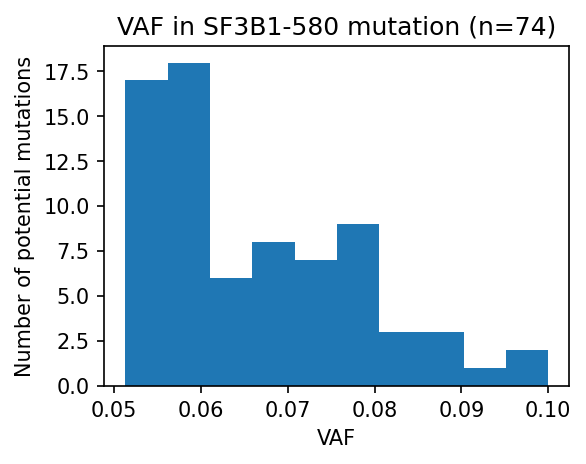

In [32]:
# Histogram
plt.hist(SF3B1_580['VAF_alt'], 10)
plt.title('VAF in SF3B1-580 mutation (n=74)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()


# ANALYSIS 2

## FILTER BY MAXIMUM FREQUENCY: DNAMT3A-882

In [33]:
### Open data with filter DNAMT3A-882


CH_mutations_50K_pot2 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_filt_50k_2.txt.gz',
                                    sep= '\t')
CH_mutations_50K_pot2


/home/sdemajo/miniconda3/envs/clonalh/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63872,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,310,43,316,359","5,7,1,1",BaseQRankSum=-0.802;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5744263,NaN,NaN,NaN,NaN
63873,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,368,43,374,418","4,8,1,1",BaseQRankSum=-1.462;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1623960,NaN,NaN,NaN,NaN
63874,X,124100595,.,T,A,0.25,2,11,0.181818,0.818182,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/K,NaN,ENSP00000360187,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,288,43,294,337","4,5,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,A|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=A|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1686791,NaN,NaN,NaN,NaN
63875,X,124100596,.,A,T,0.06,2,13,0.153846,0.846154,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3806,1269,*/L,NaN,ENSP00000360187,NaN,NaN,0/1,"11,2,0",10,NaN,NaN,"10,0,374,43,380,424","4,7,1,1",BaseQRankSum=-2.190;DP=13;ExcessHet=3.0103;MLE...,T|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=T|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5949268,NaN,NaN,NaN,NaN


In [34]:
### Get potential CH mutations from the 15 known CH genes

CH_mutations_knowngenes2 = CH_mutations_50K_pot2[CH_mutations_50K_pot2['SYMBOL'].isin(chgenes)]
CH_mutations_knowngenes2

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53227,9,5126785,.,TG,T,0.01,2,22,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,JAK2,ENST00000381652,3394,1132,G/X,NaN,ENSP00000371067,NaN,NaN,0/1,"20,2,0",9,NaN,NaN,"9,0,682,69,688,757","1,19,1,1",BaseQRankSum=-2.409;DP=22;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,.,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,4418303,NaN,NaN,NaN,NaN
53228,9,5126786,.,G,A,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",2,NaN,NaN,"2,0,473,43,479,522","1,13,1,1",BaseQRankSum=-1.556;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5067309,NaN,NaN,NaN,NaN
53229,9,5126786,.,G,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,380,43,386,429","1,9,1,1",BaseQRankSum=-1.649;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,2030823,NaN,NaN,NaN,NaN
53230,9,5126789,.,T,A,0.01,2,16,0.125000,0.875000,1,SNV,stop_lost,HIGH,JAK2,ENST00000381652,3397,1133,*/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",1,NaN,NaN,"1,0,467,43,473,516","1,13,1,1",BaseQRankSum=-1.902;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,.,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,2048065,NaN,NaN,NaN,NaN


In [35]:
### SAVE

# CH_mutations_knowngenes2.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_knownCHgenes_50k_2.txt.gz',
#                               sep="\t", index=False, compression='gzip')

In [36]:
### Number of different potential CH mutations

print('Total number of CH mutations:')
print(len(CH_mutations_knowngenes2))
print()
print('Number of different CH mutations:')
print(len(CH_mutations_knowngenes2.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))

Total number of CH mutations:
9562

Number of different CH mutations:
4794


In [37]:
### Number of mutated genes

len(CH_mutations_knowngenes2.groupby(['SYMBOL']))

15

In [38]:
### Number of patients with CH mutations

print('Number of patients with potential CH mutations in known CH drivers:')
print(len(CH_mutations_knowngenes2['patient'].value_counts()))
print()
print('Percentage of patients with potential CH mutations in known CH drivers:')
print(round(len(CH_mutations_knowngenes2['patient'].value_counts())/ 49988 * 100, 2))


Number of patients with potential CH mutations in known CH drivers:
8383

Percentage of patients with potential CH mutations in known CH drivers:
16.77


In [39]:
### Number of potential CH mutations per patient

CH_mutations_knowngenes2['patient'].value_counts().value_counts()

1    7361
2     888
3     118
4      10
5       5
6       1
Name: patient, dtype: int64

In [40]:
### DP, AD & VAF

round(CH_mutations_knowngenes2[['DP', 'AD_alt', 'VAF_alt']].describe(), 3)

,DP,AD_alt,VAF_alt
count,9562.000,9562.000,9562.000
mean,32.352,3.460,0.105
std,20.720,3.883,0.052
min,7.000,2.000,0.022
25%,19.000,2.000,0.065
50%,29.000,2.000,0.087
75%,37.000,2.000,0.133
max,274.000,44.000,0.299


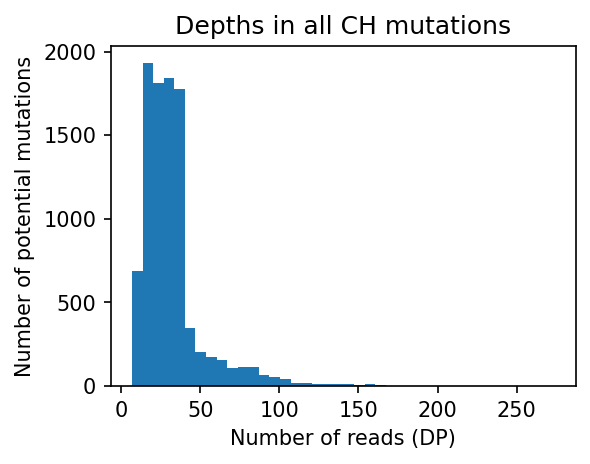

In [41]:
# Histogram DP

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes2['DP'], 40)
plt.title('Depths in all CH mutations')
plt.xlabel('Number of reads (DP)')
plt.ylabel('Number of potential mutations')
plt.show()


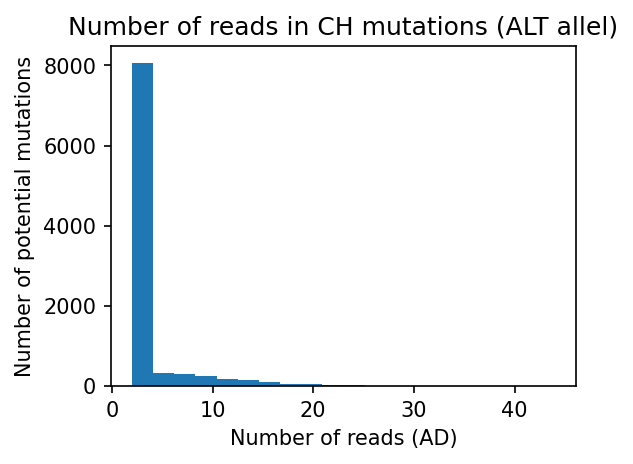

In [42]:
# Histogram AD

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes2['AD_alt'], 20)
plt.title('Number of reads in CH mutations (ALT allel)')
plt.xlabel('Number of reads (AD)')
plt.ylabel('Number of potential mutations')
plt.show()

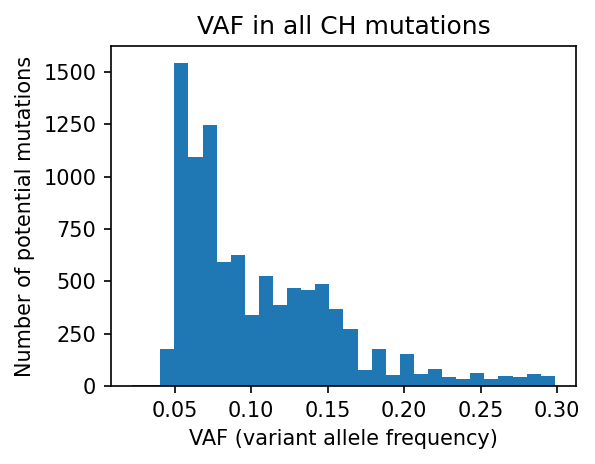

In [43]:
# Histogram VAF

plt.hist(CH_mutations_knowngenes2['VAF_alt'], 30)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF (variant allele frequency)')
plt.ylabel('Number of potential mutations')
plt.show()

Total number of variants:
9562

Number of variants with VAF < 25%:
9281
97.1

Number of variants with VAF < 20%:
8907
93.1

Number of variants with VAF < 15%:
7915
82.8

Number of variants with VAF < 10%:
5339
55.8



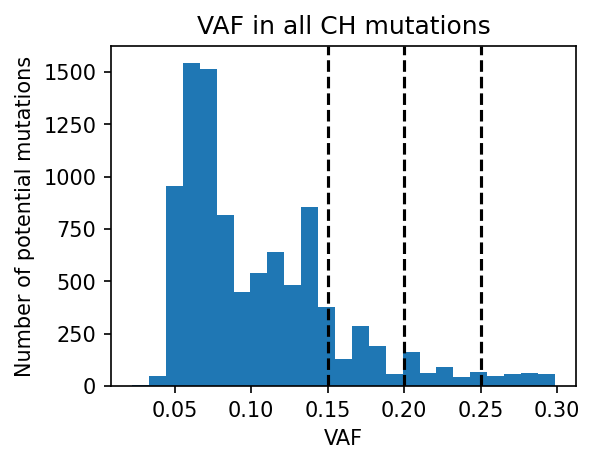

In [44]:
VAFs = CH_mutations_knowngenes2['VAF_alt']

print("Total number of variants:")
print(len(VAFs))
print()

print("Number of variants with VAF < 25%:")
VAF_25 = [i for i in VAFs if i < 0.25]
print(len(VAF_25))
print(round(len(VAF_25) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 20%:")
VAF_20 = [i for i in VAFs if i < 0.20]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 15%:")
VAF_20 = [i for i in VAFs if i < 0.15]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 10%:")
VAF_20 = [i for i in VAFs if i < 0.10]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

# Histogram VAF with thresholds

plt.hist(CH_mutations_knowngenes2['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.axvline(x=0.25, color='black',linestyle='--')
plt.axvline(x=0.2, color='black',linestyle='--')
plt.axvline(x=0.15, color='black',linestyle='--')
#plt.axvline(x=0.1, color='black',linestyle='--')
plt.show()

In [45]:
### Number of ALT per position

CH_mutations_knowngenes2['ALT_num'].value_counts()

1    9498
2      64
Name: ALT_num, dtype: int64

In [46]:
### Type of variant

CH_mutations_knowngenes2['var_type'].value_counts()

SNV      8670
Indel     885
MNV         7
Name: var_type, dtype: int64

In [47]:
### Type of consequence

round(CH_mutations_knowngenes2['Consequence'].value_counts().head(10) / 9722 * 100, 1)

missense_variant                            75.3
frameshift_variant                           8.1
stop_gained                                  6.3
missense_variant&splice_region_variant       5.3
splice_region_variant&synonymous_variant     1.6
inframe_deletion                             0.5
stop_gained&splice_region_variant            0.5
frameshift_variant&splice_region_variant     0.3
stop_lost                                    0.1
stop_retained_variant                        0.1
Name: Consequence, dtype: float64

In [48]:
### IMPACT

round(CH_mutations_knowngenes2['IMPACT'].value_counts().head(20) / 9722 * 100, 1)

MODERATE    81.1
HIGH        15.5
LOW          1.7
Name: IMPACT, dtype: float64

In [49]:
### Mutations per gene

CH_mutations_knowngenes2.groupby(['SYMBOL']).size().sort_values(ascending=False).head(20)

SYMBOL
SF3B1     3025
JAK2      1882
TET2       816
DNMT3A     808
ASXL1      613
CBL        578
GNAS       552
TP53       374
NRAS       223
PPM1D      200
GNB1       196
IDH2       124
KRAS        76
SRSF2       63
MYD88       32
dtype: int64

Text(0.5, 1.0, 'Number of mutations per gene')

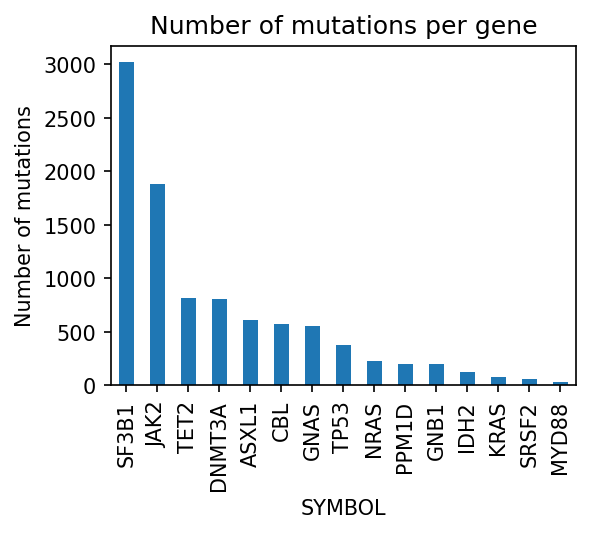

In [50]:

# Histogram

graph = CH_mutations_knowngenes2.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(4,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutations per gene")

In [51]:
#from IPython.core.display import HTML
### Mutations per gene position

mut_genpos = CH_mutations_knowngenes2.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)
df = mut_genpos.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Protein position','Number mutations']
df.head(15).style.set_properties(**{'text-align':'center'})
#display(a)
#display(HTML(mut_genpos.head(20).to_frame().to_html()))


,Gene symbol,Protein position,Number mutations
0,DNMT3A,882,91
1,SF3B1,580,74
2,GNAS,986,70
3,SF3B1,912,58
4,SF3B1,881,57
5,SF3B1,152,55
6,SF3B1,613,55
7,SF3B1,579,54
8,GNAS,669,54
9,SF3B1,907,54


In [52]:
### Number of mutation sites per gene

mut_genpos_n =mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False)
df = mut_genpos_n.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Number mutation sites']
df.head(10).style.set_properties(**{'text-align':'center'})


,Gene symbol,Number mutation sites
0,JAK2,564
1,SF3B1,537
2,TET2,385
3,DNMT3A,294
4,ASXL1,231
5,CBL,203
6,TP53,122
7,PPM1D,104
8,GNAS,87
9,GNB1,75


In [53]:
#check
CH_mutations_knowngenes2[CH_mutations_knowngenes2['SYMBOL'] == 'JAK2'].groupby(['Prot_pos']).size().sort_values(ascending=False)

Prot_pos
843    41
841    33
617    33
842    32
171    32
       ..
74      1
750     1
753     1
756     1
242     1
Length: 564, dtype: int64

Text(0.5, 1.0, 'Number of mutation sites per gene')

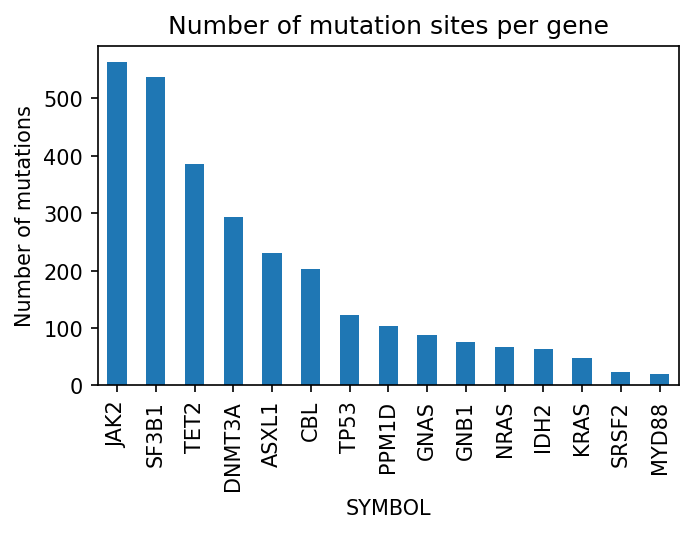

In [54]:
# Histogram

graph = mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(5,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutation sites per gene")

# ANALYSIS 3

## FILTER BY MAXIMUM FREQUENCY: DNAMT3A-882 & BY >=3 READS ALT

In [55]:
### Open data with filter DNAMT3A-882


CH_mutations_50K_pot3 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_filt_50k_3.txt.gz',
                                    sep= '\t')
CH_mutations_50K_pot3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN
3,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN
4,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,X,124090925,.,T,G,0.00,7,43,0.162791,0.837209,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"36,7,0",15,NaN,NaN,"0,15,919,105,938,1029","14,22,7,0",BaseQRankSum=-2.490;DP=43;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2523965,NaN,NaN,NaN,NaN
7575,X,124090925,.,T,G,0.00,7,48,0.145833,0.854167,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"41,7,0",43,NaN,NaN,"0,43,1234,121,1253,1330","12,29,7,0",BaseQRankSum=-2.974;DP=49;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2916101,NaN,NaN,NaN,NaN
7576,X,124090929,.,C,A,15.88,3,14,0.214286,0.785714,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3543,1181,S/R,NaN,ENSP00000360187,NaN,NaN,0/1,"11,3,0",44,NaN,NaN,"44,0,344,77,353,430","2,9,1,2",BaseQRankSum=-1.141;DP=14;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2117885,NaN,NaN,NaN,NaN
7577,X,124094103,.,C,A,0.03,3,24,0.125000,0.875000,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3664,1222,L/I,NaN,ENSP00000360187,NaN,NaN,0/1,"21,3,0",7,NaN,NaN,"7,0,747,70,756,826","9,12,1,2",BaseQRankSum=-2.057;DP=24;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2060537,NaN,NaN,NaN,NaN


In [56]:
### Get potential CH mutations from the 15 known CH genes

CH_mutations_knowngenes3 = CH_mutations_50K_pot3[CH_mutations_50K_pot3['SYMBOL'].isin(chgenes)]
CH_mutations_knowngenes3


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN
3,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN
4,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,9,5126359,.,C,A,0.13,3,25,0.120000,0.880000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3204,1068,D/E,NaN,ENSP00000371067,NaN,NaN,0/1,"22,3,0",13,NaN,NaN,"13,0,713,79,722,801","15,7,1,2",BaseQRankSum=-1.435;DP=25;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,4700951,NaN,NaN,NaN,NaN
6634,9,5126363,.,C,A,0.00,3,26,0.115385,0.884615,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3208,1070,Q/K,NaN,ENSP00000371067,NaN,NaN,0/0,"23,3,0",4,NaN,NaN,"0,4,735,69,744,809","16,7,2,1",BaseQRankSum=-1.852;DP=26;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,4135285,NaN,NaN,NaN,NaN
6635,9,5126696,.,A,G,53.77,4,20,0.200000,0.800000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3304,1102,M/V,NaN,ENSP00000371067,NaN,NaN,0/1,"16,4,0",82,NaN,NaN,"82,0,496,130,508,638","10,6,3,1",BaseQRankSum=-0.335;DP=20;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,2033706,NaN,NaN,NaN,NaN
6636,9,5126745,.,A,T,22.79,4,26,0.153846,0.846154,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3353,1118,D/V,NaN,ENSP00000371067,NaN,NaN,0/1,"22,4,0",51,NaN,NaN,"51,0,653,117,665,782","8,14,1,3",BaseQRankSum=0.555;DP=26;ExcessHet=3.0103;MLEA...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,2012410,NaN,NaN,NaN,NaN


In [57]:
### SAVE

# CH_mutations_knowngenes3.to_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_knownCHgenes_50k_3.txt.gz',
#                               sep="\t", index=False, compression='gzip')

In [58]:
### Number of different potential CH mutations

print('Total number of CH mutations:')
print(len(CH_mutations_knowngenes3))
print()
print('Number of different CH mutations:')
print(len(CH_mutations_knowngenes3.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))


Total number of CH mutations:
1998

Number of different CH mutations:
1185


In [59]:
### Number of mutated genes

len(CH_mutations_knowngenes3.groupby(['SYMBOL']))

15

In [60]:
### Number of patients with CH mutations

print('Number of patients with potential CH mutations in known CH drivers:')
print(len(CH_mutations_knowngenes3['patient'].value_counts()))
print()
print('Percentage of patients with potential CH mutations in known CH drivers:')
print(round(len(CH_mutations_knowngenes3['patient'].value_counts())/ 49988 * 100, 2))


Number of patients with potential CH mutations in known CH drivers:
1880

Percentage of patients with potential CH mutations in known CH drivers:
3.76


In [61]:
### Number of potential CH mutations per patient

CH_mutations_knowngenes3['patient'].value_counts().value_counts()

1    1770
2     103
3       6
4       1
Name: patient, dtype: int64

In [62]:
### DP, AD & VAF

round(CH_mutations_knowngenes3[['DP', 'AD_alt', 'VAF_alt']].describe(), 3)

,DP,AD_alt,VAF_alt
count,1998.000,1998.000,1998.000
mean,57.885,8.989,0.158
std,30.351,5.792,0.060
min,11.000,3.000,0.026
25%,36.000,4.000,0.109
50%,52.000,8.000,0.146
75%,75.000,12.000,0.198
max,274.000,44.000,0.299


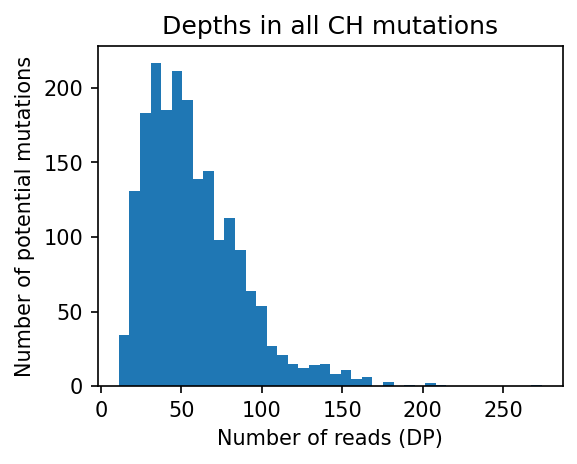

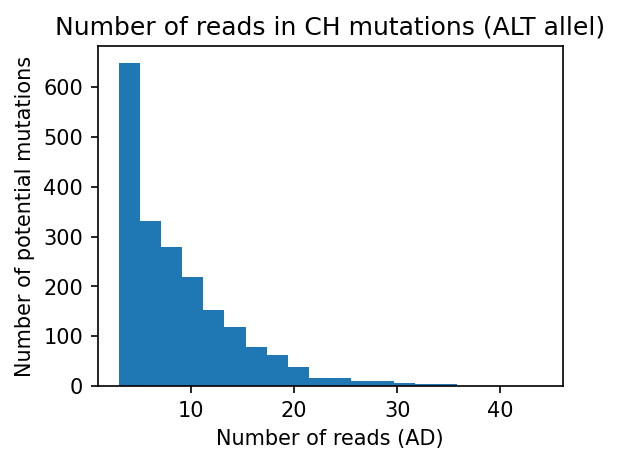

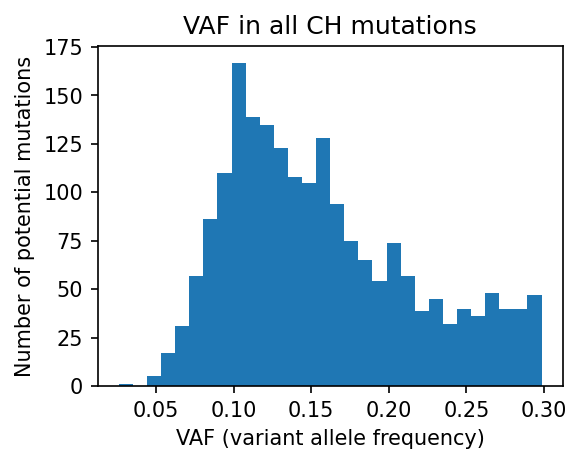

In [63]:
# Histogram DP

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes3['DP'], 40)
plt.title('Depths in all CH mutations')
plt.xlabel('Number of reads (DP)')
plt.ylabel('Number of potential mutations')
plt.show()


# Histogram AD

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_knowngenes3['AD_alt'], 20)
plt.title('Number of reads in CH mutations (ALT allel)')
plt.xlabel('Number of reads (AD)')
plt.ylabel('Number of potential mutations')
plt.show()

# Histogram VAF

plt.hist(CH_mutations_knowngenes3['VAF_alt'], 30)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF (variant allele frequency)')
plt.ylabel('Number of potential mutations')
plt.show()

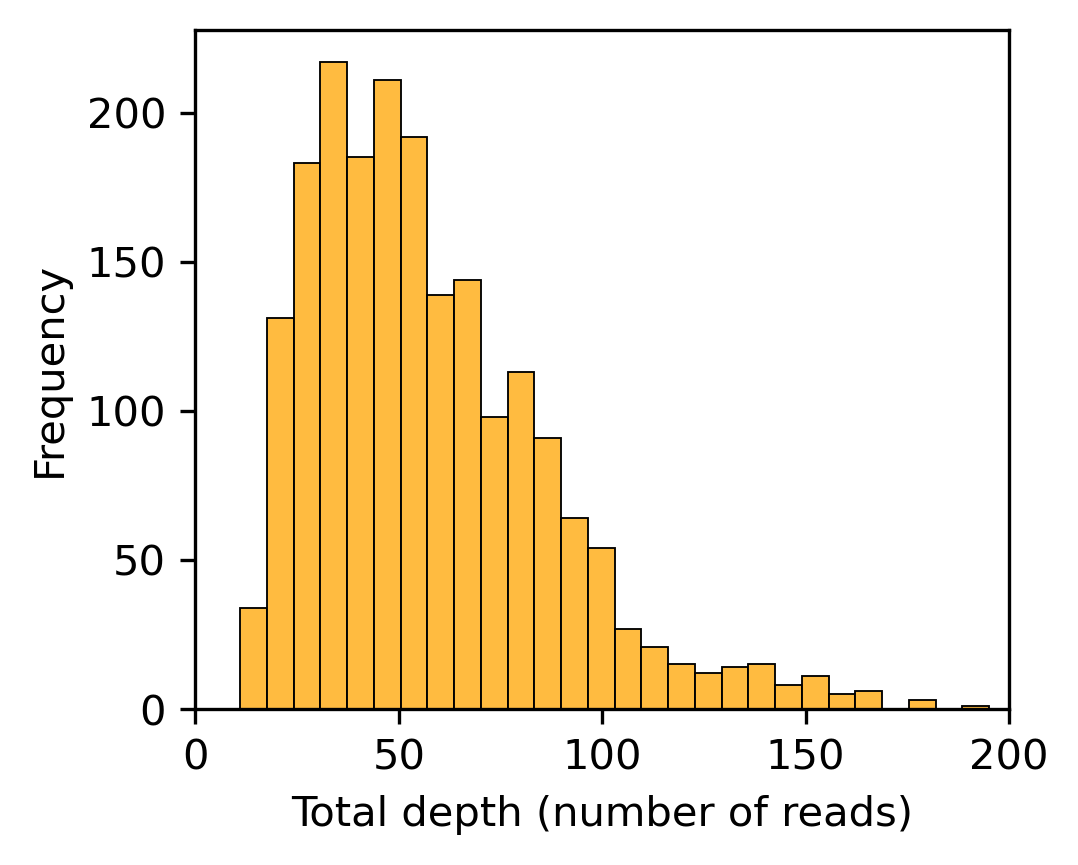

In [90]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_knowngenes3['DP'], bins=40, color="orange")
graph.set(xlabel="Total depth (number of reads)", ylabel="Frequency", xlim=[0,200])
plt.show()


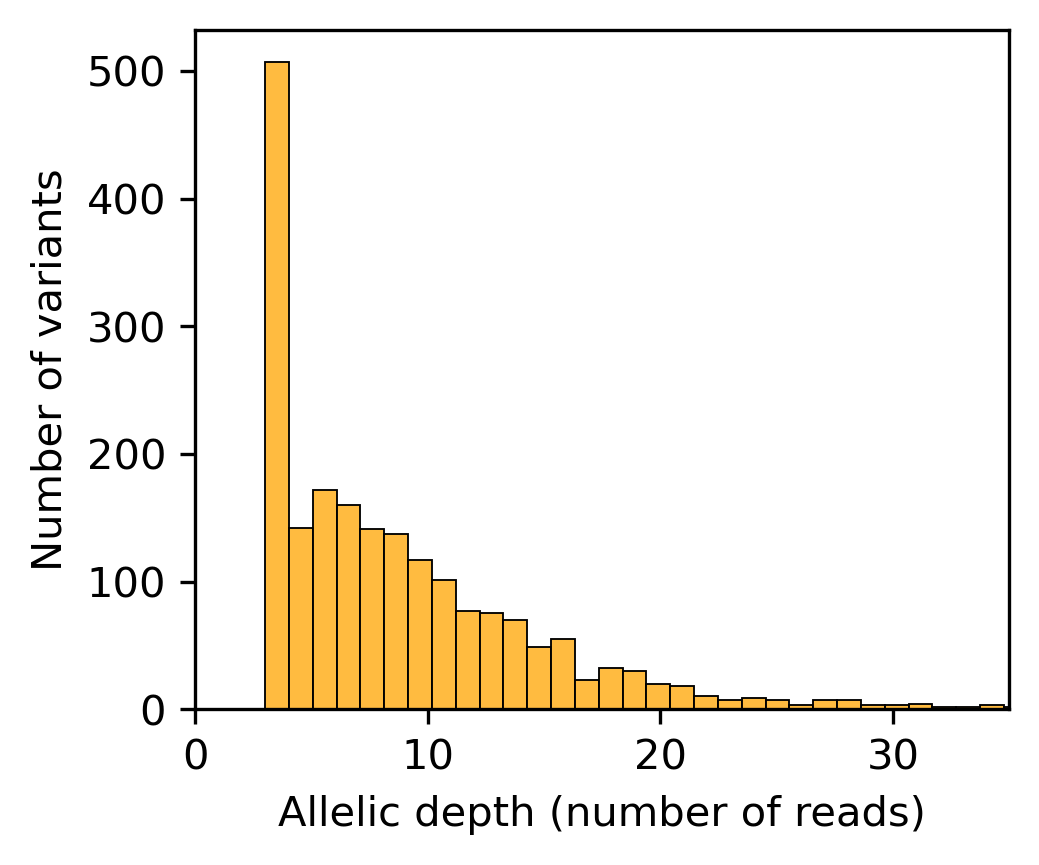

In [91]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_knowngenes3['AD_alt'], bins=40, color="orange")
graph.set(xlabel="Allelic depth (number of reads)", ylabel="Number of variants", xlim=[0,35])
plt.show()



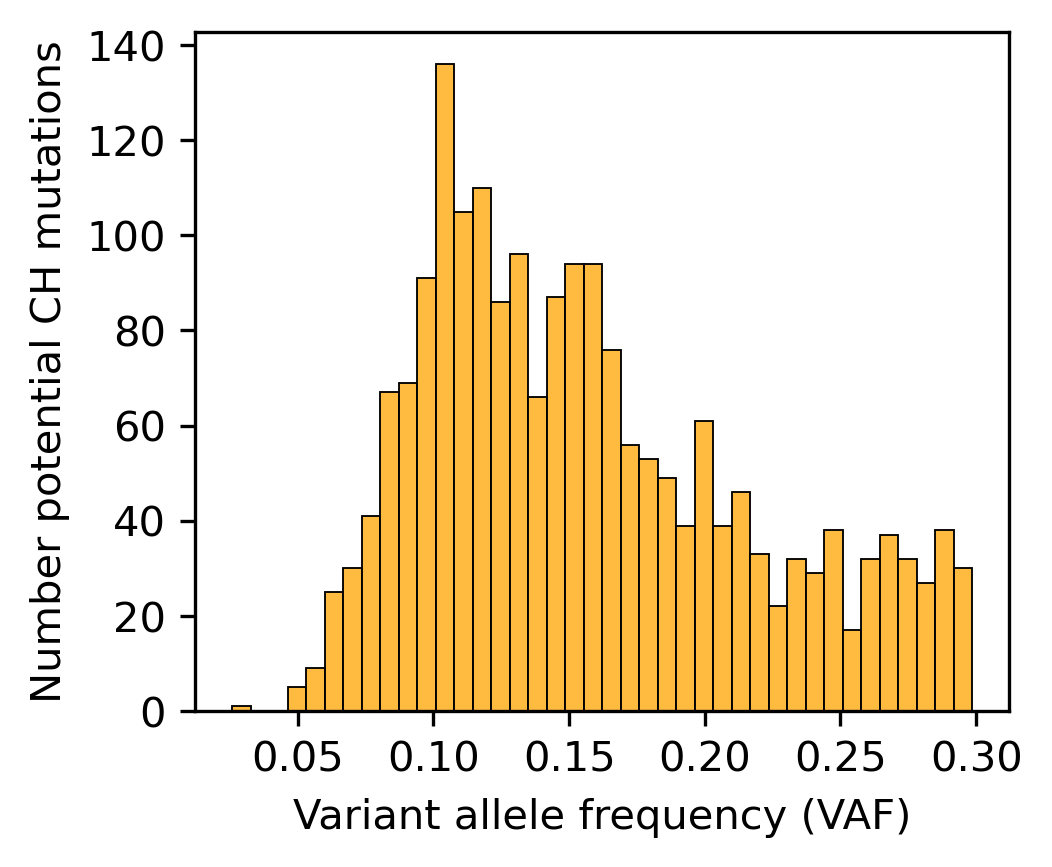

In [92]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_knowngenes3['VAF_alt'], bins=40, color="orange")
graph.set(xlabel="Variant allele frequency (VAF)", ylabel="Number potential CH mutations")
plt.show()

In [64]:
### Type of variant

CH_mutations_knowngenes3['var_type'].value_counts()


SNV      1629
Indel     369
Name: var_type, dtype: int64

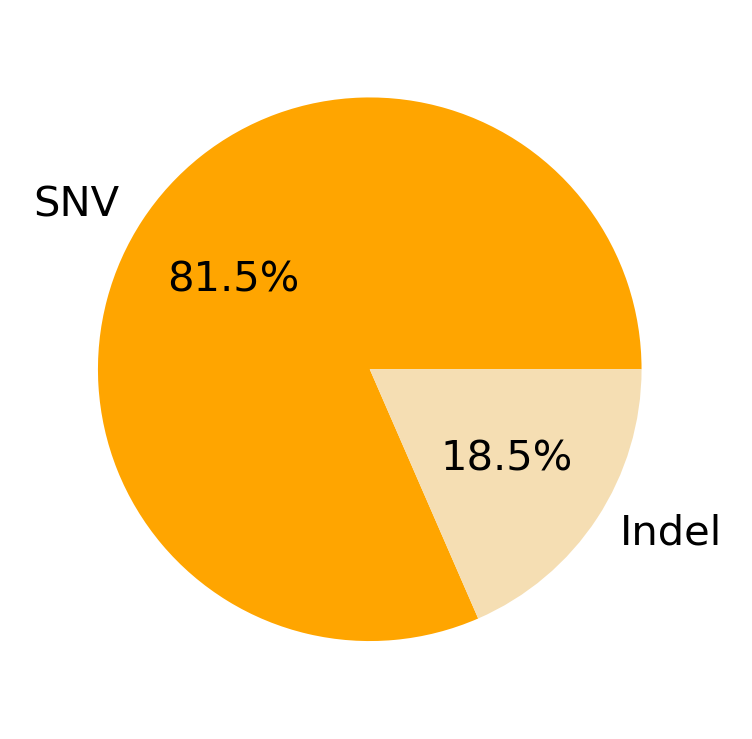

In [94]:
plt.rcParams["figure.figsize"] = (3,3)

sizes=CH_mutations_knowngenes3['var_type'].value_counts()
labels= "SNV", "Indel"
colors= "orange", "wheat"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)
plt.show()

In [65]:
### Type of consequence

round(CH_mutations_knowngenes3['Consequence'].value_counts().head(10) / 1998 * 100, 1)

missense_variant                            68.2
frameshift_variant                          15.5
stop_gained                                 11.1
inframe_deletion                             2.1
missense_variant&splice_region_variant       1.5
splice_region_variant&synonymous_variant     0.4
frameshift_variant&splice_region_variant     0.3
stop_gained&splice_region_variant            0.2
start_lost                                   0.2
inframe_insertion                            0.2
Name: Consequence, dtype: float64

In [96]:
round(CH_mutations_knowngenes3['Consequence'].apply(lambda x: x.split('&')[0]).value_counts() / 1998 * 100, 1)

missense_variant           69.7
frameshift_variant         15.8
stop_gained                11.4
inframe_deletion            2.1
splice_region_variant       0.4
start_lost                  0.3
inframe_insertion           0.2
splice_donor_variant        0.1
splice_acceptor_variant     0.1
Name: Consequence, dtype: float64

In [99]:
100-(69.7+15.8+11.4)

3.0999999999999943

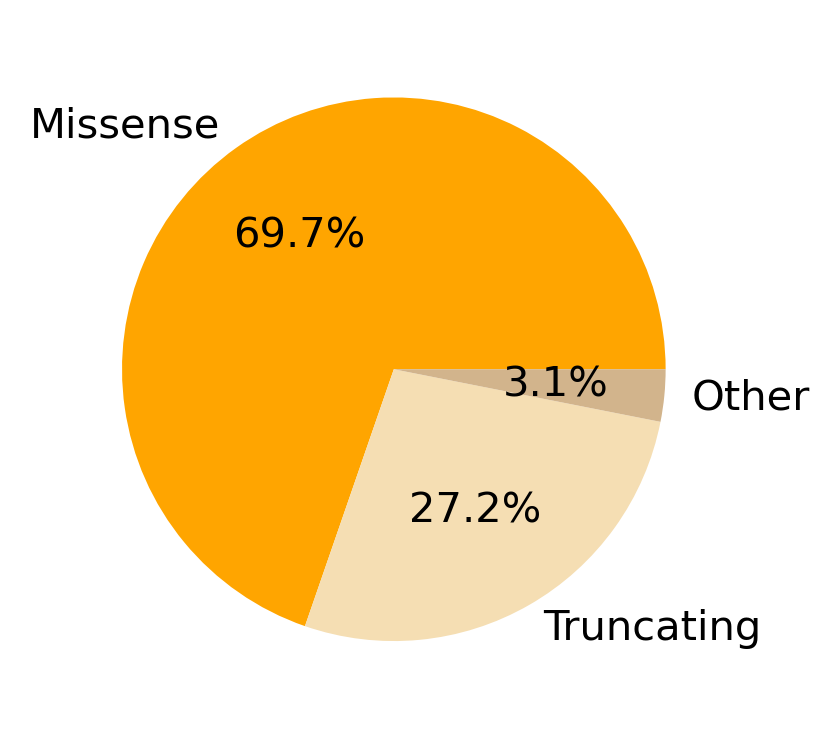

In [103]:
sizes= [69.7, 27.2, 3.1]
labels= "Missense", "Truncating", "Other"
colors= "orange", "wheat", "tan"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)
plt.show()

In [66]:
### IMPACT

round(CH_mutations_knowngenes3['IMPACT'].value_counts().head(20) / 1998 * 100, 1)

MODERATE    72.0
HIGH        27.6
LOW          0.4
Name: IMPACT, dtype: float64

In [67]:
### Mutations per gene

CH_mutations_knowngenes3.groupby(['SYMBOL']).size().sort_values(ascending=False).head(20)

SYMBOL
DNMT3A    668
TET2      394
GNAS      196
SF3B1     195
JAK2      116
CBL       108
ASXL1     108
PPM1D      61
TP53       49
SRSF2      27
IDH2       21
NRAS       16
GNB1       16
MYD88      12
KRAS       11
dtype: int64

Text(0.5, 0, 'CH driver gene')

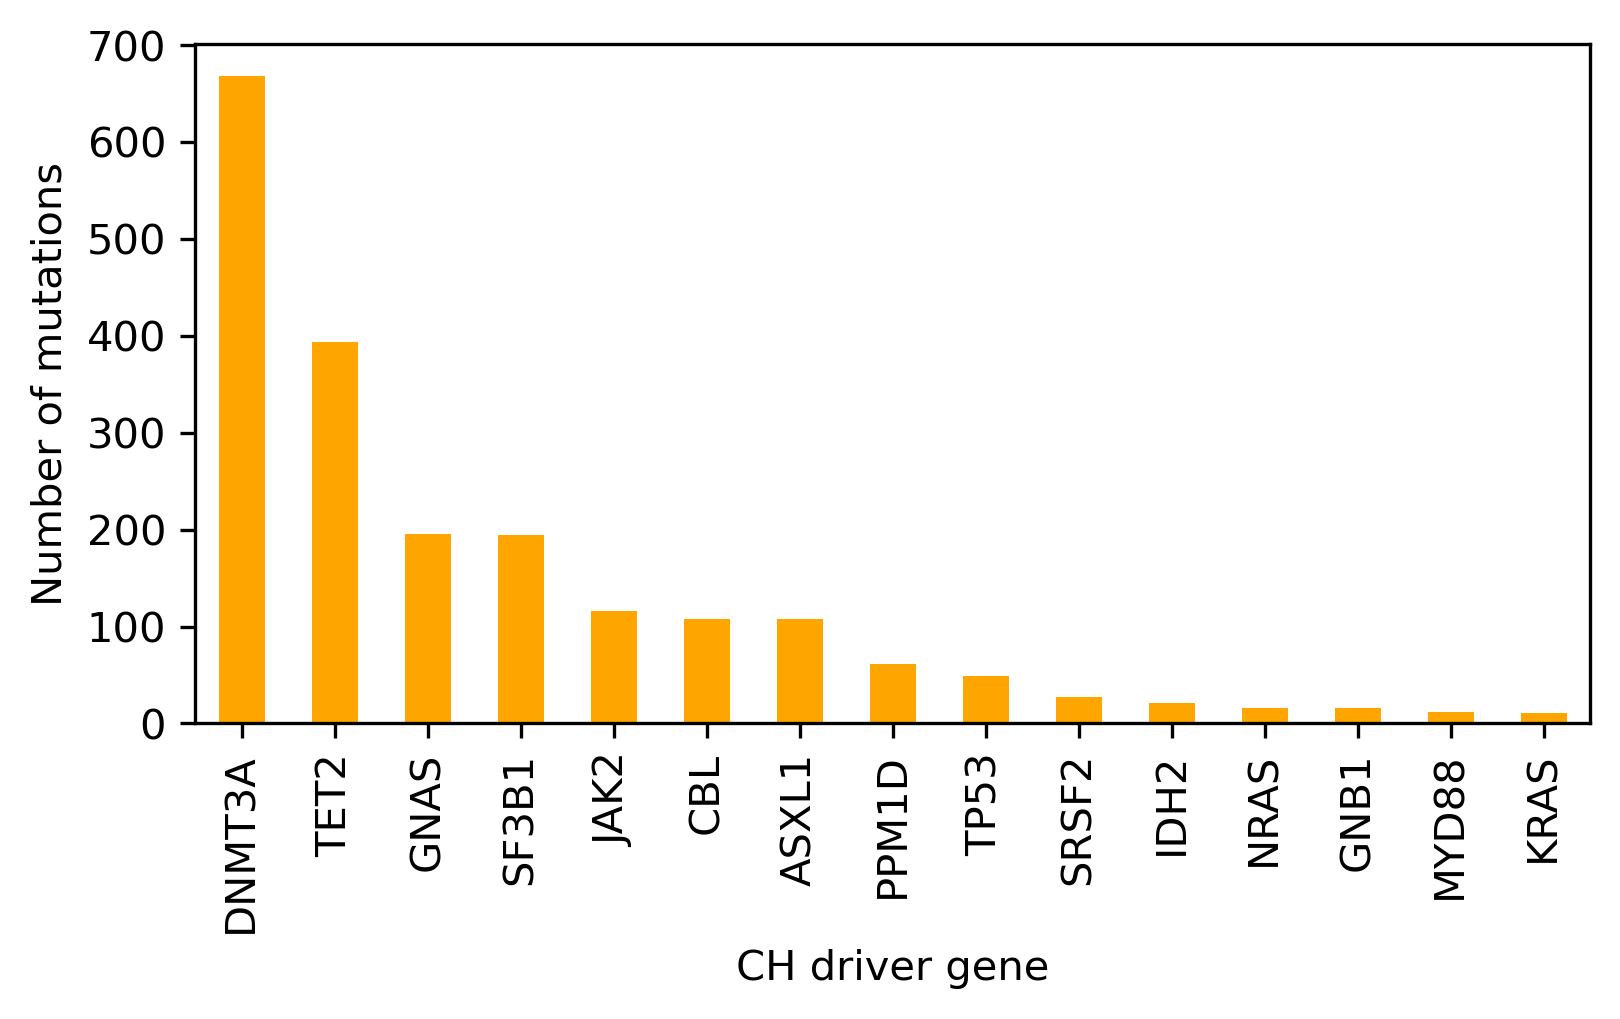

In [114]:
# Histogram

graph = CH_mutations_knowngenes3.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(6,3),color="orange")
graph.set_ylabel("Number of mutations")
graph.set_xlabel("CH driver gene")

In [116]:
#from IPython.core.display import HTML
### Mutations per gene position

mut_genpos = CH_mutations_knowngenes3.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)
df = mut_genpos.to_frame()
df = df.reset_index()
df.columns = ['CH driver gene','Protein position','Number mutations']
df.head(10).style.set_properties(**{'text-align':'center'})
#display(a)
#display(HTML(mut_genpos.head(20).to_frame().to_html()))


,CH driver gene,Protein position,Number mutations
0,DNMT3A,882,90
1,GNAS,986,70
2,SF3B1,613,55
3,GNAS,669,54
4,TET2,218,44
5,CBL,859,32
6,JAK2,617,28
7,SF3B1,579,26
8,GNAS,764,25
9,TET2,1230,22


In [70]:
### Number of mutation sites per gene

mut_genpos_n =mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False)
df = mut_genpos_n.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Number mutation sites']
df.head(10).style.set_properties(**{'text-align':'center'})

,Gene symbol,Number mutation sites
0,DNMT3A,274
1,TET2,247
2,ASXL1,89
3,SF3B1,85
4,JAK2,85
5,CBL,47
6,TP53,40
7,PPM1D,39
8,GNAS,21
9,NRAS,14


Text(0.5, 1.0, 'Number of mutation sites per gene')

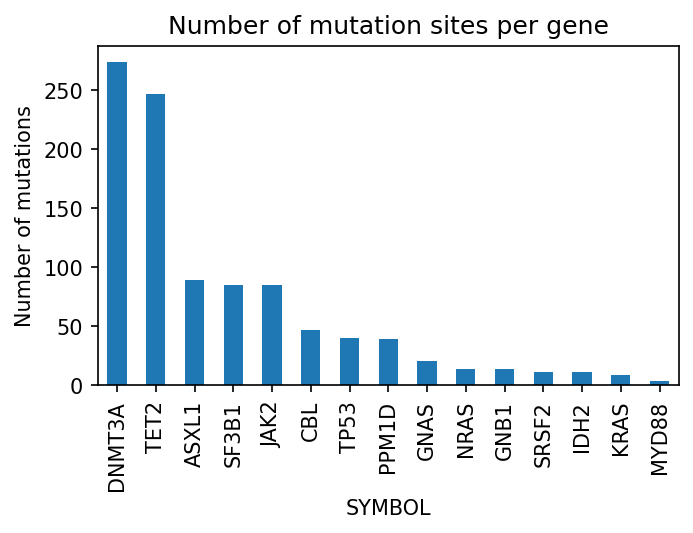

In [71]:
# Histogram

graph = mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(5,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutation sites per gene")